In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Leistungsparameter von Propellern

Die Parametrierung basiert auf dem Report NACA TR-237.

In [10]:
class PropellerStatic():
    
    def __init__(self, D, H,
        FudgeFactorCP=1.1,
        FudgeFactorCT=1.0):
        """
        This creates a propeller with diameter D [m] and pitch H [m].
        This is a generalized model neglecting the details of
        the airfoil and the twist and shape.
        """
        self.D = D
        self.H = H
        self.HoD = H/D
        self.FFP = FudgeFactorCP
        self.FFT = FudgeFactorCT
    
    def ShaftPower(self, rpm, v=0.0):
        """
        Compute the power [W] needed to spin the propeller with the requested
        revolutions per minute while in motion with the specified velicity [m/s]
        in axial direction.
        """
        x1 = 0.2877 + 0.9976*self.HoD
        x2 = -0.38
        c = -0.001849 + 0.06242*self.HoD
        J = v/(self.D*rpm/60)
        cP = (J-x1)*(J-x2)*c/(x1*x2)
        P = 1.20*self.FFP*cP*pow(rpm/60,3)*pow(self.D,5)
        return(P)

    def Thrust(self, rpm, v=0.0):
        """
        Compute the Thrust [N] generated by the propeller spinning with the requested
        revolutions per minute while in motion with the specified velicity [m/s]
        in axial direction.
        """
        x1 = 0.165 + 1.037*self.HoD
        x2 = -1.6
        c = 0.0253 + 0.1673*self.HoD - 0.0501*pow(self.HoD,2)
        J = v/(self.D*rpm/60)
        cT = (J-x1)*(J-x2)*c/(x1*x2)
        T = 1.20*self.FFT*cT*pow(rpm/60,2)*pow(self.D,4)
        return(T)
    
    def Eta(self, rpm, v=0.0):
        """
        Compute the efficiency of the propeller spinning with the requested
        revolutions per minute while in motion with the specified velicity [m/s]
        in axial direction.
        """
        return self.Thrust(rpm,v)*v / self.ShaftPower(rpm,v)

    def Vmax(self, rpm):
        """
        Compute the velocity at which the propeller generates no more thrust
        (maximum forward velocity)
        when spinning with the requested revolutions per minute.
        """
        J0 = 0.165 + 1.037*self.HoD
        vmax = J0 * self.D*rpm/60
        return(vmax)
    
    def n100W(self):
        """
        How fast will the propeller spin at 100 W shaft power.
        """
        def func(x):
            return (self.ShaftPower(x)-100.0)
        sol = optimize.root(func, 1000)
        return(sol.x[0])

# Pmotor[v_, n_] := 1.20*(n/60)^3 Dp^5 cP[Jv[v, n]];
# Thrust[v_, n_] := 1.20*(n/60)^2 Dp^4 cT[Jv[v, n]];

In [79]:
Prop = PropellerStatic(0.0254*14, 0.0254*7, FudgeFactorCP=1.0)

In [80]:
Prop.ShaftPower(5500, 0)

154.31038965236766

In [81]:
Prop.n100W()

4759.532538224575

In [82]:
Prop.Thrust(5500, 0)

15.546791742580563

In [83]:
Prop.Eta(5500, 15.0)

0.6930856009388612

In [84]:
Prop.Vmax(5500)

22.279821666666667

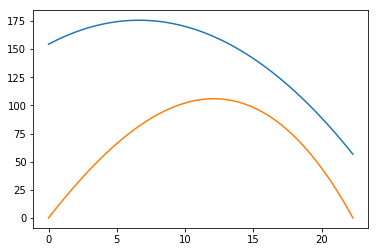

In [85]:
v = np.linspace(0,Prop.Vmax(5500),100)
P = Prop.ShaftPower(5500,v)
T = Prop.Thrust(5500,v)
Pwirk = T*v
plt.plot(v,P)
plt.plot(v,Pwirk)
plt.show()

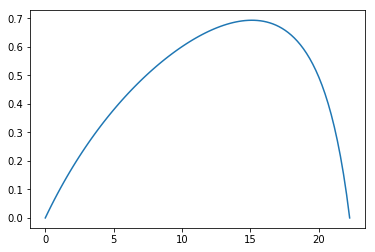

In [86]:
eta = Prop.Eta(5500,v)
plt.plot(v,eta)
plt.show()

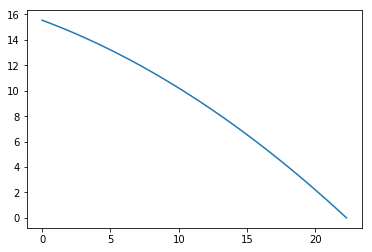

In [87]:
plt.plot(v,T)
plt.show()

,"Die Berechnung der Standschubwerte und der Arbeitspunkte erfolgt anhand der Potenzfit-Werte nach den Formeln",,,,,,,,,,,,,
,"Schub = a * n^b; Wellenleistung = c * n^d.",,,,,,,,,,,,,

"No.","(formed automatically)","Name","Ø [inches]","Pitch [inches]","a","b","Höhe über NN [m]","Temperatur [°C]","Quelle","c","d","Höhe über NN [m]","Temperatur [°C]","Quelle"

161,"12x8 AeroCAM 42mm","AeroCAM 42mm",12,8,0.0000325,2,0,15,"ber. Gerd Giese",0.0000000006343118,3,0,15,"DC generated"
176,"13x4 APC E","APC E",13,4,0.000004660349,2.199247,0,15,"MPJet",0.0000000000751054,3.2,120,18,"Hyperion"
177,"13x6 APC Sport","APC Sport",13,6,0,0,0,15,,0.000000000663405,2.999494,155,20,"Gerd Giese"
179,"13x6,5 AeroCarbon 42mm","AeroCarbon 42mm",13,6.5,0.0000299,2,60,22,"cp",0.000000000319,3.08,0,15,"Aeronaut Diagram"
198,"14x7 AeroCarbon 42mm","AeroCarbon 42mm",14,7,0.0000402,2,60,22,"cp",0.000000000523,3.08,0,15,"Aeronaut Diagram"

In [20]:
Prop = PropellerStatic(0.0254*12, 0.0254*8)
n=Prop.n100W()
print(n)
print(Prop.Thrust(n))

c=0.0000000006343118
d=3
def func(x):
    return (c*pow(x,d)-100.0)
sol = optimize.root(func, 1000)
n100W = sol.x[0]
print(n100W)

a=0.0000325
b=2.0
print(a*pow(n100W,b)/98.1)

5388.118025772128
9.5690995780784
5402.138774134173
9.668204468783136


In [28]:
Prop = PropellerStatic(0.0254*13, 0.0254*4, FudgeFactorCT=0.93)
n=Prop.n100W()
print(n)
print(Prop.Thrust(n))

c=0.0000000000751054
d=3.2
def func(x):
    return (c*pow(x,d)-100.0)
sol = optimize.root(func, 1000)
n100W = sol.x[0]
print(n100W)

a=0.000004660349
b=2.199247
print(a*pow(n100W,b)/98.1)

6215.918632138434
10.256908981397034
6149.683450430556
10.218155384384211


In [24]:
Prop = PropellerStatic(0.0254*14, 0.0254*7, FudgeFactorCT=0.8)
n=Prop.n100W()
print(n)
print(Prop.Thrust(n))

c=0.000000000523
d=3.08
def func(x):
    return (c*pow(x,d)-100.0)
sol = optimize.root(func, 1000)
n100W = sol.x[0]
print(n100W)

a=.0000402
b=2.0
print(a*pow(n100W,b)/98.1)

4610.698653359608
8.740552101704541
4600.702246318937
8.673718028575141


### 13x4.5 Propeller Carbon Fiber 1345
### mit T-Motor MN3508-29

In [71]:
Prop = PropellerStatic(0.0254*13, 0.0254*4.5, FudgeFactorCT=0.93)

In [72]:
n=4300
print(Prop.ShaftPower(n)/22.2/0.88)
print(Prop.Thrust(n))

1.9289302998818505
5.261040112195775


In [73]:
n=5300
print(Prop.ShaftPower(n)/22.2/0.88)
print(Prop.Thrust(n))

3.6119254437409296
7.992569862173026


In [74]:
n=6000
print(Prop.ShaftPower(n)/22.2/0.88)
print(Prop.Thrust(n))

5.240405810488127
10.243236562414703


In [75]:
n=6700
print(Prop.ShaftPower(n)/22.2/0.88)
print(Prop.Thrust(n))

7.296852651758523
12.772746924633223


In [76]:
n=7040
print(Prop.ShaftPower(n)/22.2/0.88)
print(Prop.Thrust(n))

8.465042556408807
14.1019775892159


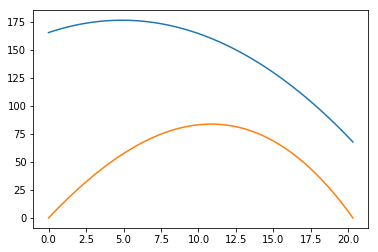

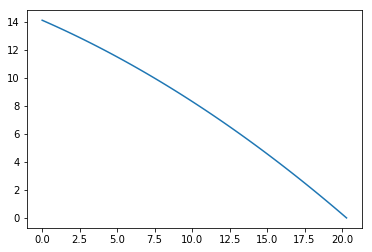

In [78]:
n=7040
v = np.linspace(0,Prop.Vmax(n),100)
P = Prop.ShaftPower(n,v)
T = Prop.Thrust(n,v)
Pwirk = T*v
plt.plot(v,P)
plt.plot(v,Pwirk)
plt.show()
plt.plot(v,T)
plt.show()